In [2]:
import build.python.pyschedlib as sc
import scripts.schedsim as sm

import os
import shutil
import matplotlib.pyplot as plt
from functools import reduce
import polars as pl
import subprocess
import itertools
import concurrent.futures
from io import StringIO

pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1)

SCHEDVIEW = "./build/apps/schedview"
sim = sm.SchedSimRunner("./build/apps/schedsim")

In [3]:
PLATFORM = "platforms/exynos5422.json"
DIR = "alloc_tasksets"
UTILIZATION = 6.5
LITTLE_PERF_SCORE = 0.33334

targets = [round(x*0.1, 1) for x in range(1, int(LITTLE_PERF_SCORE*10)+1)];
print(targets)

[0.1, 0.2, 0.3]


# Generate the tasksets

In [3]:
if os.path.isdir(DIR):
    shutil.rmtree(DIR)

os.mkdir(DIR)

util_steps = range(1, int(UTILIZATION*10)+1, 2)
NB_JOBS = 100
NB_TASK = 35
UMAX    = LITTLE_PERF_SCORE

for i in util_steps:
    data_path = f"{DIR}/{str(i)}"
    os.mkdir(data_path)
    utilization = round(i * 0.1, 1)
    print(f"jobs = {NB_JOBS}, tasks = {NB_TASK}, umax = {UMAX}, utilization = {utilization}")
    sc.generate_tasksets(data_path, NB_JOBS, NB_TASK, utilization, UMAX, success_rate = 1.0, compression_rate = 1.0)

jobs = 100, tasks = 35, umax = 0.33334, utilization = 0.1
jobs = 100, tasks = 35, umax = 0.33334, utilization = 0.3
jobs = 100, tasks = 35, umax = 0.33334, utilization = 0.5
jobs = 100, tasks = 35, umax = 0.33334, utilization = 0.7
jobs = 100, tasks = 35, umax = 0.33334, utilization = 0.9
jobs = 100, tasks = 35, umax = 0.33334, utilization = 1.1
jobs = 100, tasks = 35, umax = 0.33334, utilization = 1.3
jobs = 100, tasks = 35, umax = 0.33334, utilization = 1.5
jobs = 100, tasks = 35, umax = 0.33334, utilization = 1.7
jobs = 100, tasks = 35, umax = 0.33334, utilization = 1.9
jobs = 100, tasks = 35, umax = 0.33334, utilization = 2.1
jobs = 100, tasks = 35, umax = 0.33334, utilization = 2.3
jobs = 100, tasks = 35, umax = 0.33334, utilization = 2.5
jobs = 100, tasks = 35, umax = 0.33334, utilization = 2.7
jobs = 100, tasks = 35, umax = 0.33334, utilization = 2.9
jobs = 100, tasks = 35, umax = 0.33334, utilization = 3.1
jobs = 100, tasks = 35, umax = 0.33334, utilization = 3.3
jobs = 100, ta

# Simulate the tasksets

In [4]:
# sched = "ffa"
# for alloc in ["little_first", "big_first", "smart_ass"]:
#     print(f"-> logs_{alloc}_{sched}")
#     sim.simul(DIR, alloc, sched, PLATFORM, target, f"{DIR}_logs_{alloc}_{sched}")

alloc = "smart_ass"
sched = "grub"

for target in targets:
    print(f"-> logs_{alloc}_{sched}_{target}")
    sim.simul(DIR, alloc, sched, PLATFORM, target, f"{DIR}_logs_{alloc}_{sched}_{target}")

-> logs_smart_ass_grub_0.1


Assertion failed: (new_budget >= 0), function activate_alarms, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 357.
Assertion failed: (serv->state() == Server::State::Running), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 313.
Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 317.


-> logs_smart_ass_grub_0.2


Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 317.
Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 317.
Assertion failed: (new_budget >= 0), function activate_alarms, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 357.
Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 317.
Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/schedu

-> logs_smart_ass_grub_0.3


Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 317.
Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 317.
Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 317.
Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nextcloud/these/schedsim/schedlib/src/simulator/scheduler.cpp, line 317.
Assertion failed: ((serv->task()->remaining_time() - rt) >= -Engine::ZERO_ROUNDED), function update_server_times, file /Users/francoisillien/Nex

-> logs_smart_ass_grub_0.1


-> logs_smart_ass_grub_0.2


-> logs_smart_ass_grub_0.3


-> logs_smart_ass_grub_0.4


-> logs_smart_ass_grub_0.5


-> logs_smart_ass_grub_0.6


# Logs analysis

In [5]:
def call_cmpt(log, index):
    args = [SCHEDVIEW, "--platform", PLATFORM, log, "--frequency"]
    if index:
        args.append("--index")
    return subprocess.run(args, capture_output=True, text=True, check=True).stdout

def read_csv_to_dataframe(csv_data):
    df = pl.read_csv(StringIO(csv_data), separator=';')
    df = df.with_columns(
        (pl.col('stop') - pl.col('start')).alias('duration')
    )

    return df

def compute_cluster_stats(df):
    distribution = df.group_by(['cluster_id', 'freq']).agg([
        pl.col('duration').sum().alias('total_duration'),
        pl.col('duration').mean().alias('avg_duration'),
        pl.col('duration').count().alias('count'),
        pl.col('duration').min().alias('min_duration'),
        pl.col('duration').max().alias('max_duration')
    ])

    return distribution

def combine_distributions(distribution_list):
    combined_distribution = (
        pl.concat(distribution_list)
        .group_by(['cluster_id', 'freq'])
        .agg([
            pl.col('total_duration').sum().alias('total_duration'),
            pl.col('count').sum().alias('count'),
            pl.col('min_duration').min().alias('min_duration'),
            pl.col('max_duration').max().alias('max_duration'),
            (pl.col('total_duration').sum() / pl.col('count').sum()).alias('avg_duration')
        ])
        .sort(['cluster_id', 'freq'])
    )

    return combined_distribution

def compute_avg_freq_by_utilization(results):
    avg_freq_data = []

    for util_step, distribution in enumerate(results, start=1):
        utilization = util_step * 0.1
        avg_freq_by_cluster = (
            distribution
            .group_by('cluster_id')
            .agg([
                ((pl.col('freq') * pl.col('total_duration')).sum() /
                 pl.col('total_duration').sum()).alias('avg_frequency'),
                pl.col('total_duration').sum().alias('total_duration_sum'),
                pl.col('count').sum().alias('total_count')
            ])
        )

        avg_freq_by_cluster = avg_freq_by_cluster.with_columns(
            pl.lit(utilization).alias('utilization')
        )
        avg_freq_data.append(avg_freq_by_cluster)

    final_df = (
        pl.concat(avg_freq_data)
        .select([
            'utilization',
            'cluster_id',
            'avg_frequency',
            'total_duration_sum',
            'total_count'
        ])
        .sort(['utilization', 'cluster_id'])
    )

    return final_df

def average_freq(logs_name):
    results = []
    UTILIZATION = 6.5
    util_steps = range(1, int(UTILIZATION*10)+1, 2)
    for j in util_steps:
        util_results = []
        for i in range(1, 101):
            target = f"{logs_name}/{j}/{i}.json"
            raw_data = read_csv_to_dataframe(call_cmpt(target, True))
            util_results.append(compute_cluster_stats(raw_data))

        results.append(combine_distributions(util_results))

    return compute_avg_freq_by_utilization(results)

In [6]:
# allocations = ["smart_ass"]
# schedulers = ["grub"]

# combinations = list(itertools.product(allocations, schedulers))

# def worker(alloc, sched):
#     freq = average_freq(f"{DIR}_logs_{alloc}_{sched}").rename({"avg_frequency": f"avg_frequency_{alloc}_{sched}"})
#     return (alloc, sched, freq)

# with concurrent.futures.ThreadPoolExecutor() as executor:
#     futures = [executor.submit(worker, alloc, sched) for alloc, sched in combinations]
#     results = [future.result() for future in futures]

# freqs = {}
# for alloc, sched, freq in results:
#     if alloc not in freqs:
#         freqs[alloc] = {}
#     freqs[alloc][sched] = freq

In [7]:
# for alloc, v in freqs.items():
#     for sched, w in v.items():
#         freqs[alloc][sched] = w.with_columns((pl.arange(1, w.height + 1)).alias("id"))

# flatten_freqs = [value for subdict in freqs.values() for value in subdict.values()]

# def fusion(left, right):
#     return left.join(right, on="id", how="inner").select(
#         pl.col("id"), pl.col("utilization"), pl.col("cluster_id"), pl.selectors.matches("avg_frequency")
#     )

# avg_freqs = reduce(fusion, flatten_freqs).select(pl.all().exclude("id"))

In [8]:
# plt.figure(figsize=(15, 6))

# sched = "ffa"

# fl = avg_freqs.filter(pl.col("cluster_id") == 1)
# plt.subplot(1, 2, 1)
# plt.plot(fl["utilization"], fl[f"avg_frequency_little_first_{sched}"], label="Little First", marker='o')
# plt.plot(fl["utilization"], fl[f"avg_frequency_big_first_{sched}"], label="Big First", marker='s')
# plt.plot(fl["utilization"], fl[f"avg_frequency_smart_ass_{sched}"], label="Smart Alloc", marker='^')
# plt.xlabel("Utilization")
# plt.ylabel("Average Frequency")
# plt.title("Big Only")
# plt.legend()
# plt.grid(True)

# fl = avg_freqs.filter(pl.col("cluster_id") == 2)
# plt.subplot(1, 2, 2)
# plt.plot(fl["utilization"], fl[f"avg_frequency_little_first_{sched}"], label="Little First", marker='o')
# plt.plot(fl["utilization"], fl[f"avg_frequency_big_first_{sched}"], label="Big First", marker='s')
# plt.plot(fl["utilization"], fl[f"avg_frequency_smart_ass_{sched}"], label="Smart Alloc", marker='^')
# plt.xlabel("Utilization")
# plt.ylabel("Average Frequency")
# plt.title("Little Only")
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

[0.1, 0.2, 0.3]
{0.1: shape: (33, 2)
┌────────────────┬──────────────┐
│ accepted-rates ┆ utilizations │
│ ---            ┆ ---          │
│ f64            ┆ f64          │
╞════════════════╪══════════════╡
│ 1.0            ┆ 0.1          │
│ 1.0            ┆ 0.3          │
│ 1.0            ┆ 0.5          │
│ 1.0            ┆ 0.7          │
│ 1.0            ┆ 0.9          │
│ 1.0            ┆ 1.1          │
│ 1.0            ┆ 1.3          │
│ 1.0            ┆ 1.5          │
│ 1.0            ┆ 1.7          │
│ 1.0            ┆ 1.9          │
│ 1.0            ┆ 2.1          │
│ 1.0            ┆ 2.3          │
│ 1.0            ┆ 2.5          │
│ 1.0            ┆ 2.7          │
│ 1.0            ┆ 2.9          │
│ 1.0            ┆ 3.1          │
│ 1.0            ┆ 3.3          │
│ 0.999856       ┆ 3.5          │
│ 0.996006       ┆ 3.7          │
│ 0.97302        ┆ 3.9          │
│ 0.944873       ┆ 4.1          │
│ 0.915845       ┆ 4.3          │
│ 0.890872       ┆ 4.5          │
│ 0.863816 

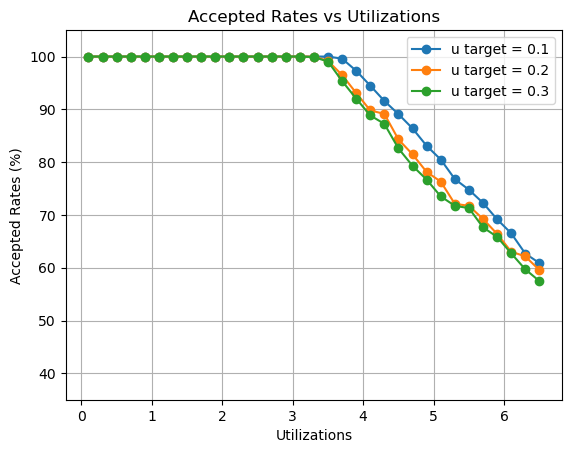

In [14]:
def compute_accepted(logs_dir):
    args = [SCHEDVIEW, "--platform", PLATFORM, "-d", logs_dir, "--index", "--rejected", "--arrivals"]
    df = pl.read_csv(StringIO(subprocess.run(args, capture_output=True, text=True, check=True).stdout), separator=';')
    return df.with_columns((1 - (pl.col("rejected") / pl.col("arrivals"))).alias("accepted-rates")).select(pl.col("accepted-rates")).mean()

accepted_rates = {}
alloc = "smart_ass"
sched = "grub"

print(targets)

for target in targets:
    accepted_rates[target] = {}
    accepted_df = []
    UTILIZATION = 6.5
    util_steps = range(1, int(UTILIZATION*10)+1, 2)
    for i in util_steps:
        accepted_df.append(compute_accepted(f"{DIR}_logs_{alloc}_{sched}_{target}/{i}").with_columns(utilizations=i/10))

    accepted_rates[target] = pl.concat(accepted_df)

print(accepted_rates)

fig, ax = plt.subplots()
for target in targets:
    ax.plot(accepted_rates[target]["utilizations"], accepted_rates[target]["accepted-rates"] * 100, label=f"u target = {str(target)}", marker='o')

ax.set_ylim(35, 105)
ax.set_xlabel("Utilizations")
ax.set_ylabel("Accepted Rates (%)")
ax.set_title("Accepted Rates vs Utilizations")
plt.legend()
plt.grid(True)
plt.show()

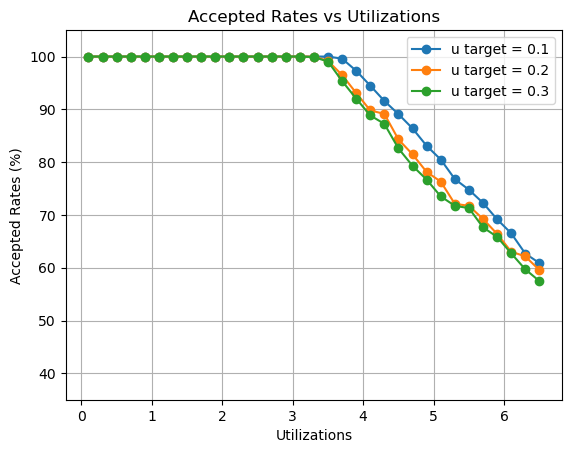

In [15]:
def compute_migrated(logs_dir):
    args = [SCHEDVIEW, "--platform", PLATFORM, "-d", logs_dir, "--index", "--cmigration", "--arrivals"]
    df = pl.read_csv(StringIO(subprocess.run(args, capture_output=True, text=True, check=True).stdout), separator=';')
    return df.with_columns((pl.col("cmigration") / pl.col("arrivals")).alias("migration-rates")).select(pl.col("migration-rates")).mean()

alloc = "smart_ass"
sched = "grub"

migration_rates = {}
for target in targets:
    migration_rates[target] = {}
    for sched in ["grub"]:
        migration_df = []
        util_steps = range(1, int(UTILIZATION*10)+1, 2)
        for i in util_steps:
            migration_df.append(compute_migrated(f"{DIR}_logs_{alloc}_{sched}_{target}/{i}").with_columns(utilizations=i/10))

        migration_rates[target] = pl.concat(migration_df)

fig, ax = plt.subplots()
for target in targets:
    ax.plot(accepted_rates[target]["utilizations"], accepted_rates[target]["accepted-rates"] * 100, label=f"u target = {str(target)}", marker='o')

ax.set_ylim(35, 105)
ax.set_xlabel("Utilizations")
ax.set_ylabel("Accepted Rates (%)")
ax.set_title("Accepted Rates vs Utilizations")
plt.legend()
plt.grid(True)
plt.show()